## About the probability density function
* When the random variable is continuous then probability density function is used. Whereas, when there is discrete values then Probability Mass Function is calculated
* Example of Probability Density function is probability of lightening the bulb at every second.
* Example of Probability Mass function is tossing the coins

Thus, probability density function is calculated by taking the integration of all probability values from -infinity to infinity range

## Parametric Probability density and Non-Parametric Probability density
* In Parametric, the distribution can be determined by parameters such as mean, median, standard deviation or logs.
* Different types of parametric probability density estimators are  
1) Normal Distribution  
2) Exponential Distribution  
3) Uniform Distribution  

<b> Normal Density Distribution </b>
The formula for normal distribution is <br/>

<img src="https://qphs.fs.quoracdn.net/main-qimg-3e8079c89f2b8355c6be752b79feaa54-lq"> </img>

Mean=50.062, Standard Deviation=4.774


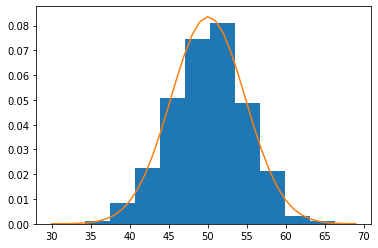

In [35]:
# example of parametric probability density estimation
from matplotlib import pyplot
from numpy.random import normal
from numpy import mean
from numpy import std
from scipy.stats import norm
# generate a sample
sample = normal(loc=50, scale=5, size=1000)
# calculate parameters
sample_mean = mean(sample)
sample_std = std(sample)
print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
# define the distribution
dist = norm(sample_mean, sample_std)
# sample probabilities for a range of outcomes
values = [value for value in range(30, 70)]
probabilities = [dist.pdf(value) for value in values]
# plot the histogram and pdf
pyplot.hist(sample, bins=10, density=True)
pyplot.plot(values, probabilities)
pyplot.show()

## Problems with parametric probability density function
* Here, we assumed that the distribution will be normal. So, we are able to fit the gaussian curve.
* Moreover, the histogram is not complex. Since, it is unimodal.
* When, histogram is getting complex with more then one spikes, in that scenario we need to define the kernel estimator that estimates the plot

## Non-Parametric probability density function (Kernel Density Estimator)
* The kernel is nothing but a window that slides and perform the mathematical operation. Here it is called parzen window
* Here the window is defined as $1/(2*h)$ and it is travelled on the datapoints ranging $(x-h)$ to $(x+h)$. This will give the estimated height based on distribution of data. 
* It means where data clustering is more, the height of the curve is high and increasing where density is compacting and decreasing for vice versa.
* The whole equation is defined as,
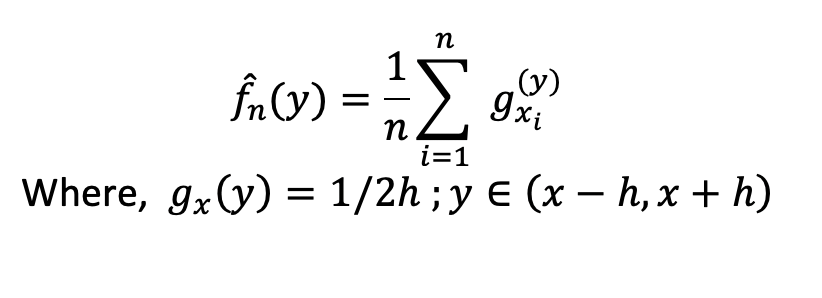 <br/>
<i> Source: NPTEL Lecture by Prof. C.A. Murthy </i>
* The working example of Parzen estimator is given here https://datascience.stackexchange.com/a/48033
* So, Non-Parametric is used when there is multimodal distribution and when we cannot figure out the distribution type
* In order to estimate the shape of PDF, kernel density estimator is used

## Now understanding the KDE plot

### Let's take subset of the dataset for analysis 
* We are taking first 15 rows of the 0th column

In [33]:
from sklearn import datasets
import pandas as pd
import ipywidgets
from ipywidgets import widgets
import matplotlib.pyplot as plt
%matplotlib inline 

df = pd.DataFrame(datasets.fetch_california_housing()['data'])

In [34]:
import numpy as np
np.round(df.iloc[:15,0],0)

0     8.0
1     8.0
2     7.0
3     6.0
4     4.0
5     4.0
6     4.0
7     3.0
8     2.0
9     4.0
10    3.0
11    3.0
12    3.0
13    3.0
14    2.0
Name: 0, dtype: float64

In [36]:
subset = df.iloc[:15,0]

In [37]:
subset = np.round(subset,2) #Note: This returns pandas dataframe not numpy array#

In [38]:
import seaborn as sns

### Difference between KDE and Histogram:-
* For that let's see how histogram is made on this subset of the data

In [39]:
subset

0     8.33
1     8.30
2     7.26
3     5.64
4     3.85
5     4.04
6     3.66
7     3.12
8     2.08
9     3.69
10    3.20
11    3.27
12    3.08
13    2.67
14    1.92
Name: 0, dtype: float64

/opt/miniconda3/envs/intel/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


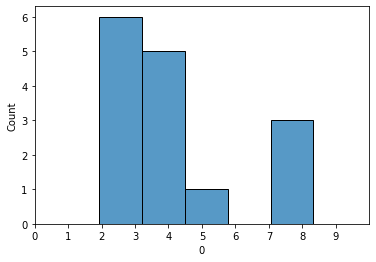

In [40]:
from seaborn import histplot

fig, ax = plt.subplots()
sns.histplot(subset)
ax.set_xlim(0,10)
ax.set_xticks(range(0,10))
fig.show()

In [41]:
import numpy as np
mean = np.mean(subset)
std = np.std(subset)
print(f"The mean is {mean} and the standard deviation is {std}")

The mean is 4.274 and the standard deviation is 2.0370102274330057


In [42]:
## Now defining the normal distribution 
from scipy.stats import norm
distribution = norm(mean,std)

In [43]:
probabilities = distribution.pdf(subset.sort_values())
print("The probabilities are ",probabilities)

The probabilities are  [0.100445   0.10965018 0.14364022 0.16493407 0.16681128 0.17043276
 0.1734464  0.18714916 0.18796141 0.19164999 0.19455902 0.15641108
 0.06688271 0.02777687 0.02697708]


* Here if you can see then <b><i> binning </i></b> is performed.
* For example, in subset for range from 7.0 to 8.5, values are ==> [8.3252,8.3014,7.2574]
* Thus in the graph you can see count is 3 for 7.0 to 8.5

# Univariate KDE plot

/opt/miniconda3/envs/intel/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


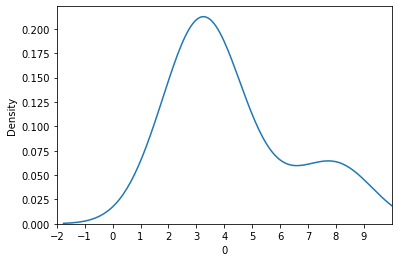

In [44]:
fig, ax = plt.subplots()
sns.kdeplot(subset)
ax.set_xlim(-2,10)
ax.set_xticks(range(-2,10))
fig.show()

<b> Note: </b> <br/>
While kernel density estimation produces a probability distribution, the height of the curve at each point gives a density, not a probability <br/>
The curve is normalized so that the integral over all possible values is 1, meaning that the scale of the density axis depends on the data values.

## Understanding different parameters in KDE plot
* Note:- Many of the parameters are now depricated. 
* The parameters which are depricated and which are new is present over here https://github.com/mwaskom/seaborn/blob/069d53a3dd29a965987705c823883a93700bbe5e/seaborn/distributions.py#L1579

<b> 1. bw_adjust --> Bandwidth adjustment. Higher the value of bw_adjust smoother will be curve, and lower the value will be spiky. </b>

Bandwidth selection strongly influences the estimate obtained from the KDE (much more so than the actual shape of the kernel).
Bandwidth selection can be done by a "rule of thumb", by cross-validation, by "plug-in methods" or by other means.
More information can be founded over this https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html

In [45]:
bw_adjust = widgets.FloatRangeSlider(min=0.0,max=1,step=0.01)
display(bw_adjust)

FloatRangeSlider(value=(0.25, 0.75), max=1.0, step=0.01)

<b>In order to identify the optimal bandwidth, there are a few types of approaches:<br/></b>
* This is used to smoothening the curve.
* Silverman’s rule of thumb: assumes Gaussian distribution for the unknown density. It is not the most optimal bandwidth selector but is used either as a very fast reasonably good estimator or as a first estimator in multistage bandwidth selectors. More precise solve-the-equation plug-in rules use estimation of integrated squared density derivative functional to estimate the optimal bandwidth. They demand high computations to solve a non-linear equation using iterative methods. They use ROT as a very first estimate
* Scott’s rule of thumb:is optimal for random samples of normally distributed data, in the sense that it minimizes the integrated mean squared error of the density estimate.

In [46]:
bw_method_value = None
def f(x):
    global bw_method_value
    bw_method_value = x
widgets.interact(f,x=["scott","silverman"])

interactive(children=(Dropdown(description='x', options=('scott', 'silverman'), value='scott'), Output()), _do…

<function __main__.f(x)>

<b> 2. Cut: It defines the truncation of the line </b> <br/>
Now, since it tries to form bell shape, the left bounding of the graph and right bounding of the graph are formed based on the prediction
* Hence using cut we define how much to truncate

In [47]:
cut_adjust = widgets.IntRangeSlider(min=-15,max=15,step=1)
display(cut_adjust)

IntRangeSlider(value=(-7, 7), max=15, min=-15)

<b> 3. Shade: A boolean value </b> <br/>
Whether to shade the bell curve or not 

/opt/miniconda3/envs/intel/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


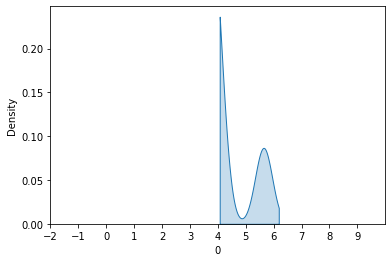

In [48]:
fig, ax = plt.subplots()
sns.kdeplot(subset,bw_adjust=bw_adjust.value[0],bw_method=bw_method_value,cut=cut_adjust.value[0],shade=True)
ax.set_xlim(-2,10)
ax.set_xticks(range(-2,10))
fig.show()

<b> Not used much features:- </b><br/>
<b>4. grid size (int)</b>
* It is used to tell, how many points to consider when plotting the curve.

In [49]:
grid_adjust = widgets.IntRangeSlider(min=1,max=100,step=10)
display(grid_adjust)

IntRangeSlider(value=(25, 75), min=1, step=10)

/opt/miniconda3/envs/intel/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


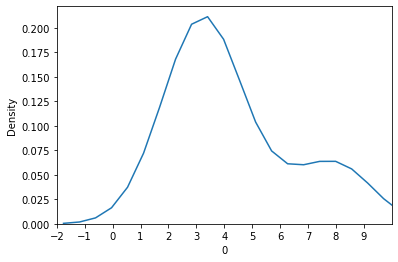

In [50]:
fig, ax = plt.subplots()
sns.kdeplot(subset,gridsize=grid_adjust.value[0])
ax.set_xlim(-2,10)
ax.set_xticks(range(-2,10))
fig.show()

## Multiplot in KDE

In [51]:
x1 = df.iloc[:15,0]
a = ["A"]*10
a.extend(["B"]*5)
x2 = pd.DataFrame(a)

In [52]:
data = pd.DataFrame(pd.concat([x1,x2],axis=1))
data.columns = ["Values","Category"]
data

,Values,Category
0,8.3252,A
1,8.3014,A
2,7.2574,A
3,5.6431,A
4,3.8462,A
5,4.0368,A
6,3.6591,A
7,3.1200,A
8,2.0804,A
9,3.6912,A


<AxesSubplot:xlabel='Values', ylabel='Density'>

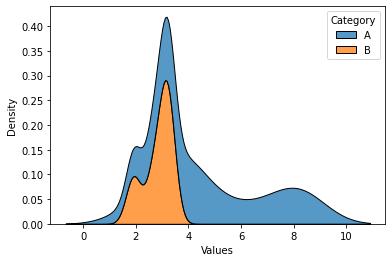

In [53]:
sns.kdeplot(data = data, x="Values",hue="Category",fill=True,bw_adjust=0.70,multiple="stack")

The interpretation of the graph is that: <br/>
For category A, the data is clustered more at 3.0 <br/>
For category B, the data has more variance and maximum clustering is near to 4 and followed by near to 8.0

<AxesSubplot:xlabel='Values', ylabel='Density'>

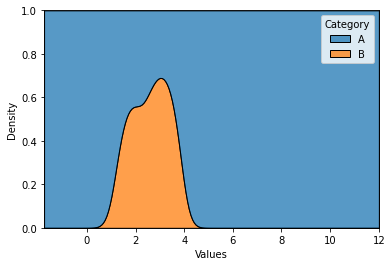

In [54]:
sns.kdeplot(data = data, x="Values",hue="Category",fill=True,multiple="fill")

/opt/miniconda3/envs/intel/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


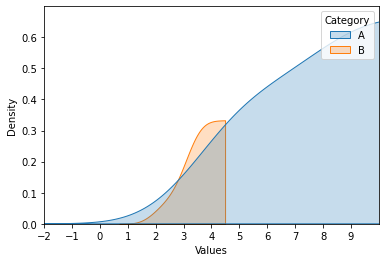

In [55]:
fig, ax = plt.subplots()
sns.kdeplot(data = data, x="Values",hue="Category",fill=True,cumulative=True,common_norm=True, common_grid=False)
ax.set_xlim(-2,10)
ax.set_xticks(range(-2,10))
fig.show()

## When there is ordinal data then use the palette="crest" to show the ordinarity

/opt/miniconda3/envs/intel/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


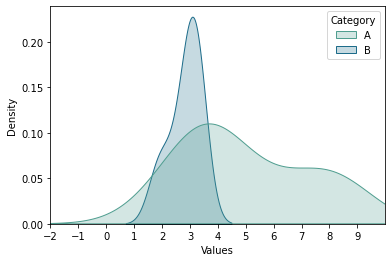

In [56]:
fig, ax = plt.subplots()
sns.kdeplot(data = data, x="Values",hue="Category",palette="crest",fill=True)
ax.set_xlim(-2,10)
ax.set_xticks(range(-2,10))
fig.show()

# Bivariate KDE plot
* Here instead of random variables, there are random vectors. That is observation are in 2d space
* Generally, the density is defined as $mass / volume$. Here density is defined as number of points (mass) lying in the specific volume. The volume is calculated by considering the Kth nearest neighbour, determining the radius and determining the volume using that radius.
* This is called contour density plot

In [57]:
x1 = df.iloc[:15,0]
x2 = df.iloc[:15,1]

In [58]:
pd.concat([x1,x2],axis=1)

,0,1
0,8.3252,41.0
1,8.3014,21.0
2,7.2574,52.0
3,5.6431,52.0
4,3.8462,52.0
5,4.0368,52.0
6,3.6591,52.0
7,3.1200,52.0
8,2.0804,42.0
9,3.6912,52.0


In [60]:
np.mean(x1)

4.273313333333333

In [61]:
np.median(x2)

52.0

/opt/miniconda3/envs/intel/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


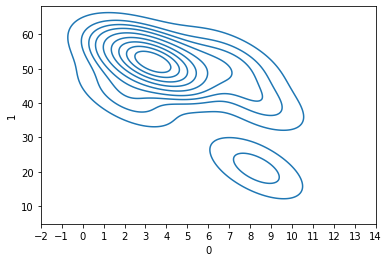

In [62]:
fig, ax = plt.subplots()
sns.kdeplot(x=x1,y=x2,)
ax.set_xlim(-2,10)
ax.set_xticks(range(-2,15))
fig.show()

<b> 1. Levels parameter </b><br/>
* We can control the number of contours using levels parameter

<AxesSubplot:xlabel='0', ylabel='1'>

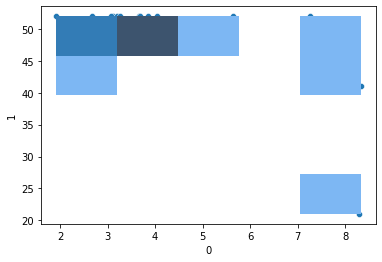

In [63]:
sns.scatterplot(x=x1,y=x2)
sns.histplot(x=x1,y=x2)

/opt/miniconda3/envs/intel/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


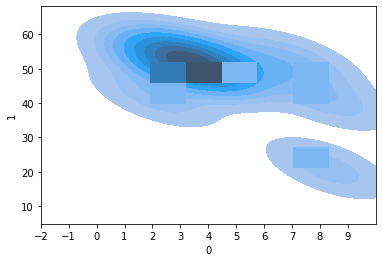

In [64]:
fig, ax = plt.subplots()
sns.scatterplot(x=x1,y=x2)
sns.kdeplot(x=x1,y=x2,fill=True)
sns.histplot(x=x1,y=x2)
ax.set_xlim(-2,10)
ax.set_xticks(range(-2,10))
fig.show()

* This can be understand that, the height (1/2h) will be high in darker region. Indicating there are more scattered points. The height will decrease at lower shades. 
* Thus, from the scatter plot, it is clear that (3,52) are more frequently occuring from (x1,x2)
* Moreover, the outlier is also obtained as (8.3,21) 

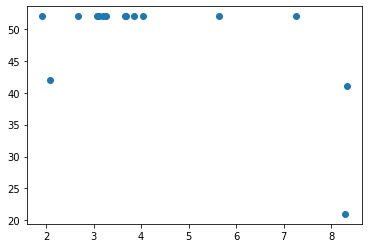

In [65]:
plt.scatter(x1,x2)

/opt/miniconda3/envs/intel/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


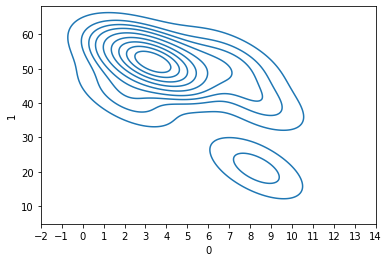

In [66]:
fig, ax = plt.subplots()
sns.kdeplot(x=x1,y=x2,levels=10,thresh=.05)
ax.set_xlim(-2,10)
ax.set_xticks(range(-2,15))
fig.show()